# Section 2: Counting solutions

In [1]:
from basic import *
from counting_sets import *
from counting_sols import *
from triangles import *
from circle_regions_demo import *
import sympy as sp
from IPython.display import display, Math, Latex

**Proposition 2.1**

The following line checks that the function `count_pos_sols(k,n)` (which just returns $\binom{n-1}{k-1}$) is a correct count of the list returned by `list_pos_sols(k,n)`

In [2]:
all([len(list_pos_sols(k,n)) == count_pos_sols(k,n) for k in range(1,10) for n in range(1,10)])

True

The proof of Proposition 2.1 involves a bijection between positive solutions of $x_1+\dotsb+x_k=n$ and subsets of size $k-1$ in $\{1,\dotsc,n-1\}$.  This bijection is implemented by the Python functions `pos_sol_to_set()` and `set_to_pos_sol()`.  The cell below checks that these functions are in fact inverse to each other.

In [3]:
k = 4
n = 8
A = list_pos_sols(k,n)
B = list_subsets(n-1,k-1)
[pos_sol_to_set(k,n,x) for x in A] == B and [set_to_pos_sol(k,n,S) for S in B] == A

True

**Example 2.3**

In [4]:
list_pos_sols(4,6)

[[1, 1, 1, 3],
 [1, 1, 2, 2],
 [1, 1, 3, 1],
 [1, 2, 1, 2],
 [1, 2, 2, 1],
 [1, 3, 1, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 2, 1, 1],
 [3, 1, 1, 1]]

**Proposition 2.4**

The following line checks that the function `count_nonneg_sols(k,m)` (which just returns $\binom{m+k-1}{k-1}$) is a correct count of the list returned by `list_nonneg_sols(k,m)`

In [5]:
all([len(list_nonneg_sols(k,m)) == count_nonneg_sols(k,m) for k in range(1,10) for m in range(1,10)])

True

The proof of Proposition 2.4 involves a bijection between nonnegative solutions of $x_1+\dotsb+x_k=m$ and subsets of size $k-1$ in $\{1,\dotsc,m+k-1\}$.  This bijection is implemented by the Python functions `nonneg_sol_to_set()` and `set_to_nonneg_sol()`.  The cell below checks that these functions are in fact inverse to each other.

In [6]:
k = 4
m = 8
A = list_nonneg_sols(k,m)
B = list_subsets(m+k-1,k-1)
[nonneg_sol_to_set(k,m,x) for x in A] == B and [set_to_nonneg_sol(k,m,S) for S in B] == A

True

**Problem 2.7**

<Axes: >

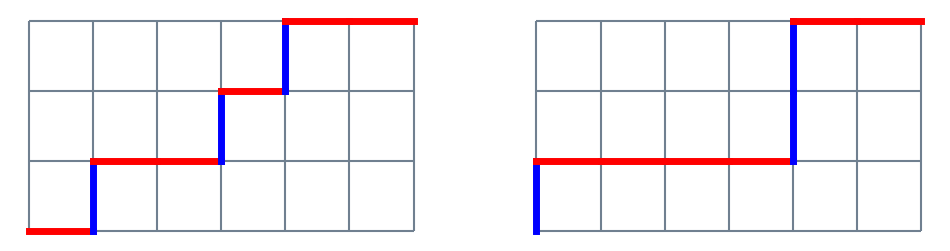

In [8]:
n = 6
m = 3
S0 = {1,3,4,6,8,9}
r0 = set_to_grid_route(n,m,S0)
S1 = {2,3,4,5,8,9}
r1 = set_to_grid_route(n,m,S1)
fig, ax = plt.subplots(1,2,figsize=(12,3))
for i in range(2):
    show_grid(n,m,ax=ax[i])
    ax[i].axis('off')
show_grid_route(r0,6,3,ax=ax[0])
show_grid_route(r1,6,3,ax=ax[1])

Problem 2.7 involves a bijection between routes across the $n\times m$ grid and subsets of size $n$ in $\{1,\dotsc,n+m\}$.  This bijection is implemented by the Python functions `set_to_grid_route()` and `grid_route_to_set()`.  The cell below checks that these functions are in fact inverse to each other.  Because of technicalities about comparison of sets in Python, we have to convert the elements of `B` and `B1` from sets to sorted lists before we compare them.

In [15]:
n = 7
m = 5
A = sorted(list_grid_routes(n,m))
B = sorted(list_subsets(n+m,n))
A1 = sorted([set_to_grid_route(n,m,S) for S in B])
B1 = sorted([grid_route_to_set(n,m,r) for r in A])
B = sorted([sorted(list(b)) for b in B])    # Convert sets to sorted lists
B1 = sorted([sorted(list(b)) for b in B1])  # Convert sets to sorted lists
A == A1 and B == B1

True

**Proposition 2.9**

The cell below checks the identity $\binom{n}{k}=\sum_{m=k}^n\binom{m-1}{k-1}$ for $0<k\leq n$.

In [18]:
all([math.comb(n,k) == sum([math.comb(m-1,k-1) for m in range(k,n+1)]) for n in range(1,10) for k in range(1,n+1)])

True

**Proposition 2.10**

<Axes: >

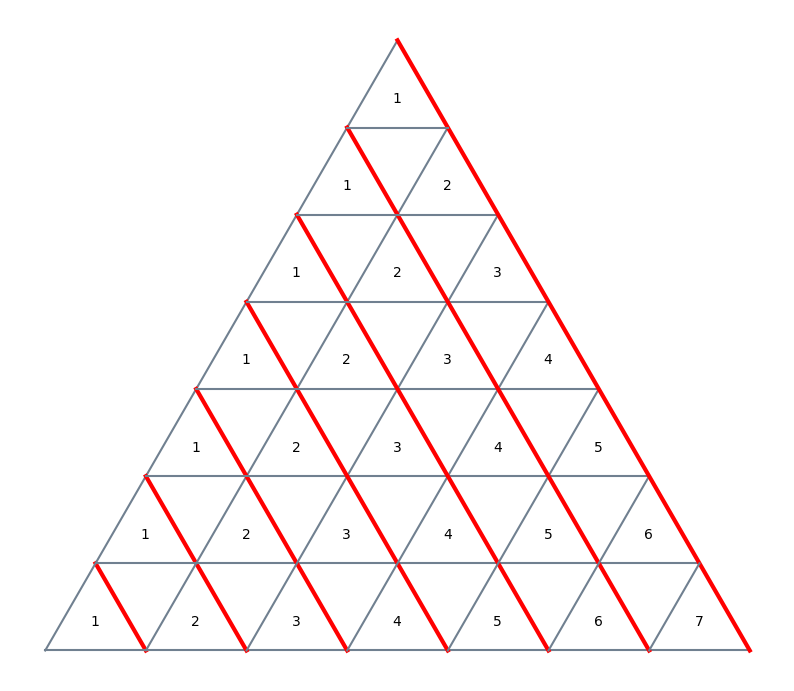

In [7]:
triangle_grid(7,with_numbers=True,with_stripes=True)

**Problem 2.11**

Text(3.5, 2.0207259421636903, '3')

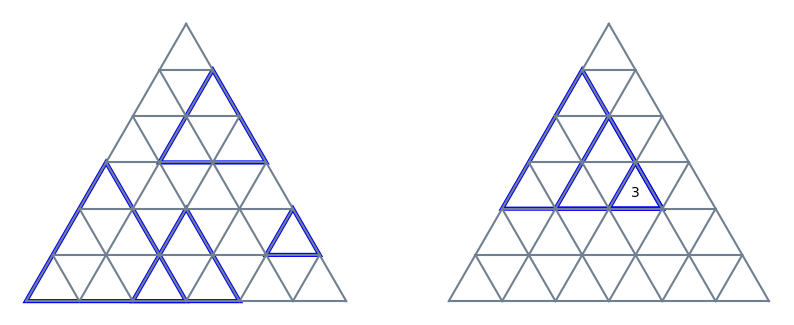

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    ax[i].set_aspect('equal')
    ax[i].axis('off')
triangle_grid(6,ax[0])
triangle_grid(6,ax[1])
triangle_subtriangle(6,[0,1,4],ax[0])
triangle_subtriangle(6,[0,3,5],ax[0])
triangle_subtriangle(6,[1,6,7],ax[0])
triangle_subtriangle(6,[3,5,7],ax[0])
triangle_subtriangle(6,[2,3,6],ax[1])
triangle_subtriangle(6,[2,4,6],ax[1])
triangle_subtriangle(6,[2,5,6],ax[1])
triangle_text([7/3,7/3],'3',ax[1])

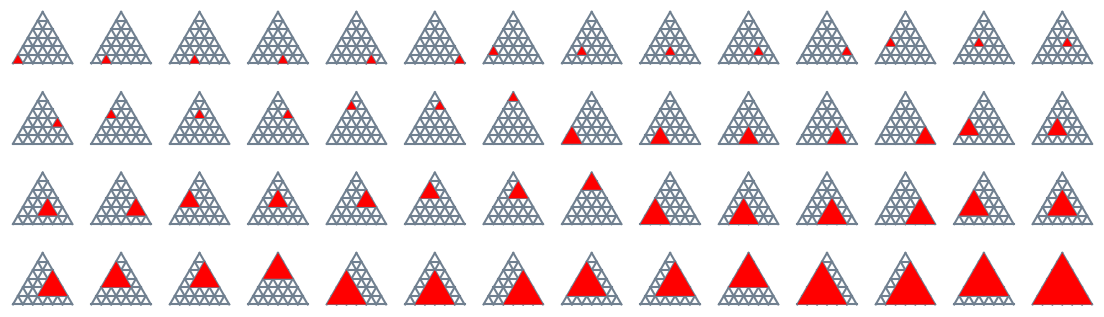

In [49]:
L = [sorted(list(s)) for s in list_subsets(range(8),3)]
L = sorted(L, key=lambda x: x[2]-x[1])
fig,ax = plt.subplots(4,14,figsize=(14,4))
ax = ax.flatten()
for m in range(56):
    ax[m].set_aspect('equal')
    ax[m].axis('off')
    [i,j,k] = L[m]
    u = [k-i-1,i]
    v = [j-i-1,i]
    w = [j-i-1,k-j+i]
    triangle_polygon([u,v,w],ax[m],facecolor='red',zorder=3)
    triangle_grid(6,ax=ax[m])


**Definition 2.12**

In [50]:
[fibonacci(n) for n in range(8)]

[1, 1, 2, 3, 5, 8, 13, 21]

**Proposition 2.13**

This proposition states that $f_n=g_n$, where $f_n$ is the $n$th Fibonacci number (defined by $f_0=f_1=1$ and $f_{n+2}=f_n+f_{n+1}$) and $g_n=\sum_{g\geq 0}\binom{n-k}{k}$.  These sequences are implemented by the Python functions `fibonacci(n)` and `fibonacci_alt(n)`.  The cell below checks that these are the same for $n<20$.

In [53]:
[fibonacci_alt(n) for n in range(20)] == [fibonacci(n) for n in range(20)]

True

**Example 2.15**

<Axes: >

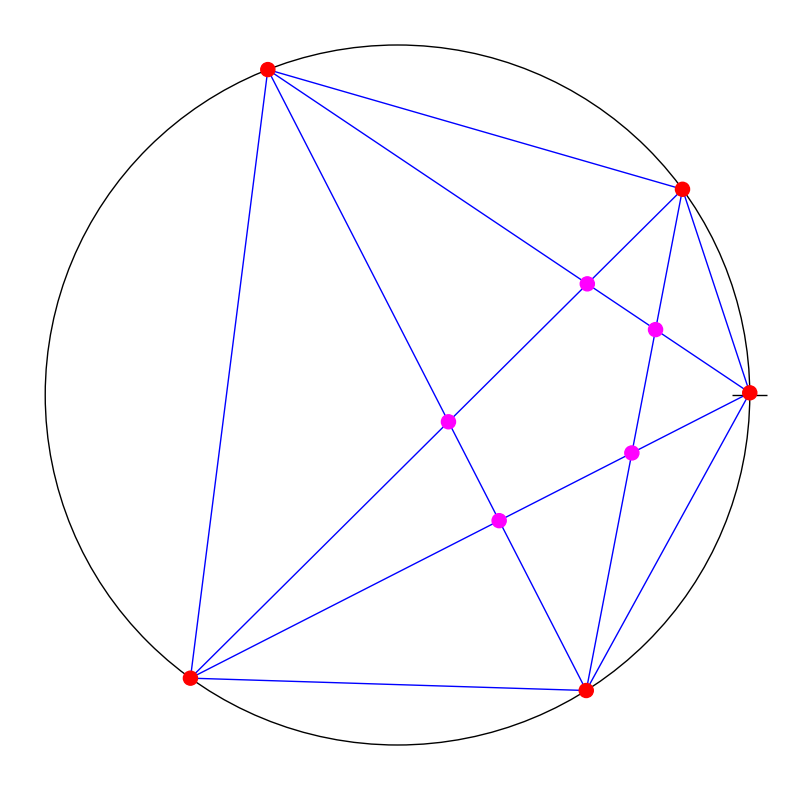

In [3]:
D = CircleRegionsDemo([0.001,0.1,0.31,0.65,0.84])
D.show_full_plot()